In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar los datos
df = pd.read_csv('datos_credito.csv')

# Verificar valores únicos por si hay errores o inconsistencias
print(df.nunique())


Edad                     52
Historial_Pagos           3
Ingreso_Mensual       99472
Monto_Solicitado      99917
Estado_Laboral            3
Tiempo_Empleo           301
Nivel_Educativo           3
Estado_Civil              3
Num_Dependientes          5
Puntaje_Crediticio      550
Aprobacion                2
dtype: int64


In [39]:
# Transformar variables categóricas en variables dummy
df_encoded = pd.get_dummies(df, drop_first=True)


In [43]:
print(df.columns.tolist())

['Edad', 'Historial_Pagos', 'Ingreso_Mensual', 'Monto_Solicitado', 'Estado_Laboral', 'Tiempo_Empleo', 'Nivel_Educativo', 'Estado_Civil', 'Num_Dependientes', 'Puntaje_Crediticio', 'Aprobacion']


In [47]:
# Paso 1: Guardar la columna objetivo antes de codificar
y = df['Aprobacion']

# Paso 2: Codificar el resto
X = pd.get_dummies(df.drop('Aprobacion', axis=1), drop_first=True)

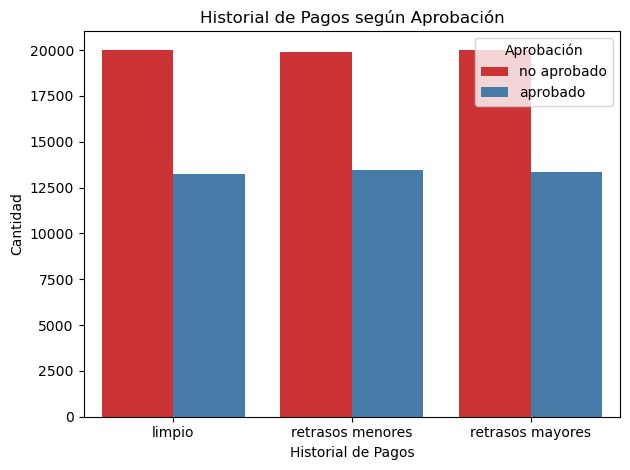

In [72]:
sns.countplot(data=df, x='Historial_Pagos', hue='Aprobacion', palette='Set1')
plt.title('Historial de Pagos según Aprobación')
plt.xlabel('Historial de Pagos')
plt.ylabel('Cantidad')
plt.legend(title='Aprobación')
plt.tight_layout()
plt.show()


C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_20912\2746339243.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Aprobacion', palette='pastel')


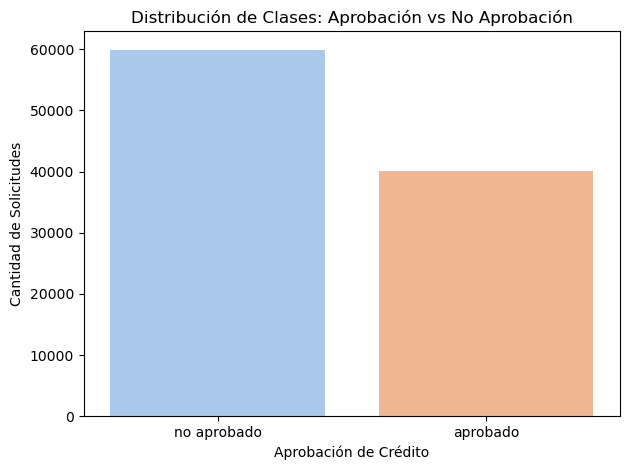

In [68]:
sns.countplot(data=df, x='Aprobacion', palette='pastel')
plt.title('Distribución de Clases: Aprobación vs No Aprobación')
plt.xlabel('Aprobación de Crédito')
plt.ylabel('Cantidad de Solicitudes')
plt.tight_layout()
plt.show()


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

=== Reporte de Clasificación ===
              precision    recall  f1-score   support

    aprobado       0.36      0.00      0.00      8017
 no aprobado       0.60      1.00      0.75     11983

    accuracy                           0.60     20000
   macro avg       0.48      0.50      0.38     20000
weighted avg       0.50      0.60      0.45     20000



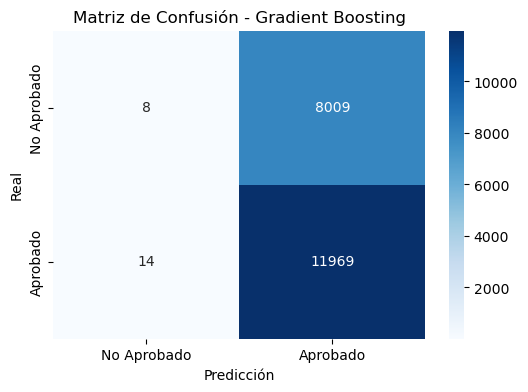

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar el modelo
modelo = GradientBoostingClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Reporte de métricas
print("=== Reporte de Clasificación ===")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Aprobado', 'Aprobado'], yticklabels=['No Aprobado', 'Aprobado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Gradient Boosting')
plt.show()


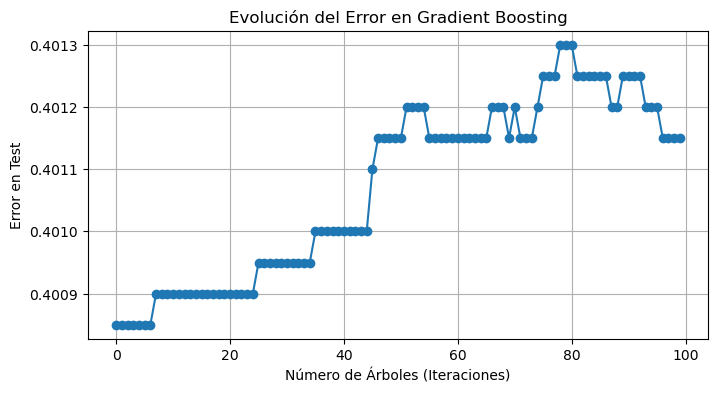

In [58]:
import numpy as np

# Guardar los errores en cada etapa del boosting
errors = []

# Vamos evaluando las predicciones en cada iteración del ensemble
for y_pred_stage in modelo.staged_predict(X_test):
    errors.append(np.mean(y_pred_stage != y_test))

# Graficar evolución del error
plt.figure(figsize=(8, 4))
plt.plot(errors, marker='o')
plt.xlabel('Número de Árboles (Iteraciones)')
plt.ylabel('Error en Test')
plt.title('Evolución del Error en Gradient Boosting')
plt.grid(True)
plt.show()


**junto con los hiperparametros vistos en clase**

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_tuneado = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42
)

modelo_tuneado.fit(X_train, y_train)
y_pred_tuneado = modelo_tuneado.predict(X_test)

=== Reporte de Clasificación (Modelo Ajustado) ===
              precision    recall  f1-score   support

    aprobado       0.34      0.00      0.00      8017
 no aprobado       0.60      1.00      0.75     11983

    accuracy                           0.60     20000
   macro avg       0.47      0.50      0.38     20000
weighted avg       0.50      0.60      0.45     20000



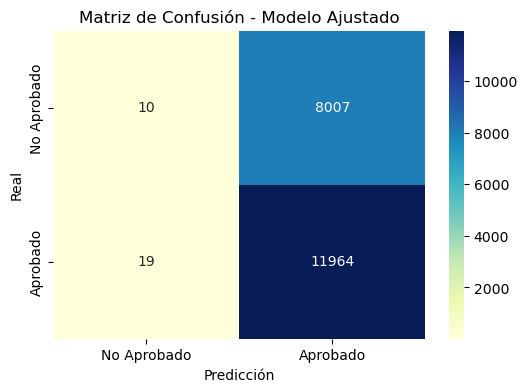

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones
y_pred_tuneado = modelo_tuneado.predict(X_test)

# Reporte de métricas
print("=== Reporte de Clasificación (Modelo Ajustado) ===")
print(classification_report(y_test, y_pred_tuneado))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred_tuneado)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No Aprobado', 'Aprobado'], yticklabels=['No Aprobado', 'Aprobado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Modelo Ajustado')
plt.show()


C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_20912\3056628497.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=importancia_df, palette='viridis')


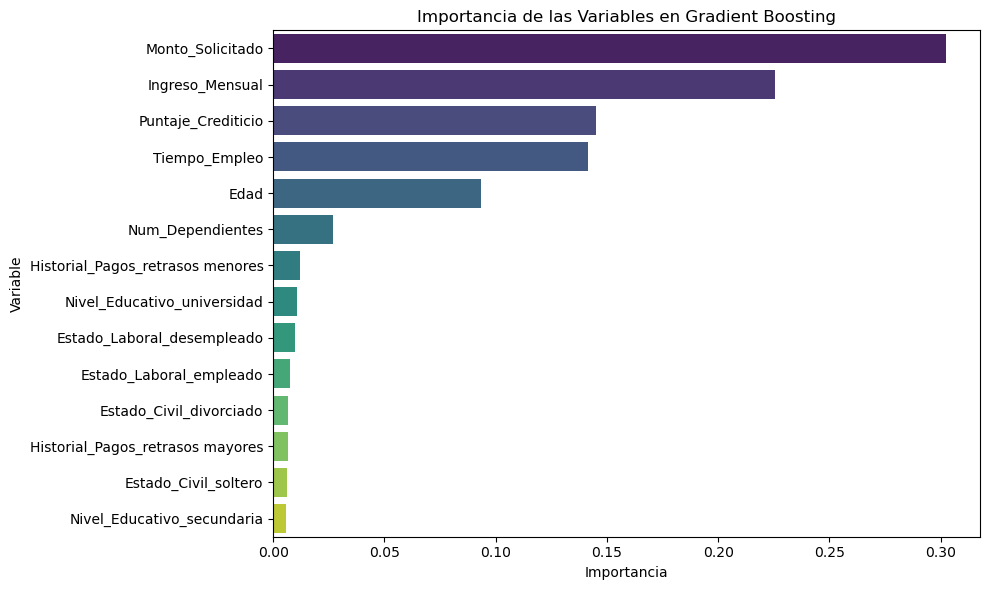

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener importancias y nombres de columnas
importancias = modelo_tuneado.feature_importances_
nombres_columnas = X_train.columns

# Crear DataFrame ordenado
importancia_df = pd.DataFrame({
    'Variable': nombres_columnas,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=importancia_df, palette='viridis')
plt.title('Importancia de las Variables en Gradient Boosting')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


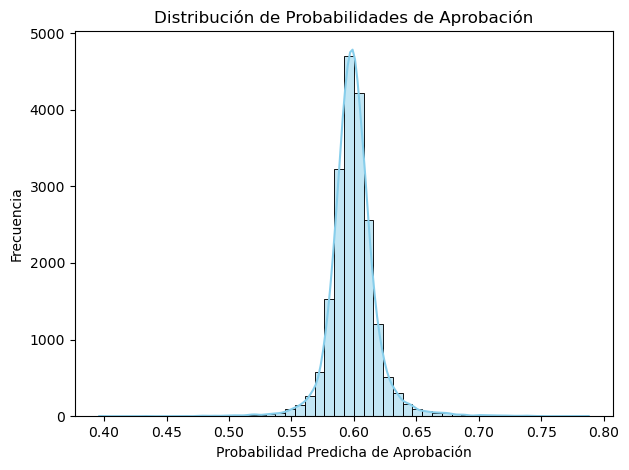

In [66]:
sns.histplot(y_proba, bins=50, kde=True, color='skyblue')
plt.title('Distribución de Probabilidades de Aprobación')
plt.xlabel('Probabilidad Predicha de Aprobación')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


In [78]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

# Solo dos variables para visualizar
X_vis = df[['Ingreso_Mensual', 'Monto_Solicitado']]
y_vis = df['Aprobacion']

# Si y_vis no es numérico, lo codificamos
if y_vis.dtype == 'object':
    y_vis = LabelEncoder().fit_transform(y_vis)

# Entrenar nuevo modelo solo para visualización
modelo_vis = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42)
modelo_vis.fit(X_vis, y_vis)



GradientBoostingClassifier(n_estimators=50, random_state=42)

C:\Users\Rog Strix\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


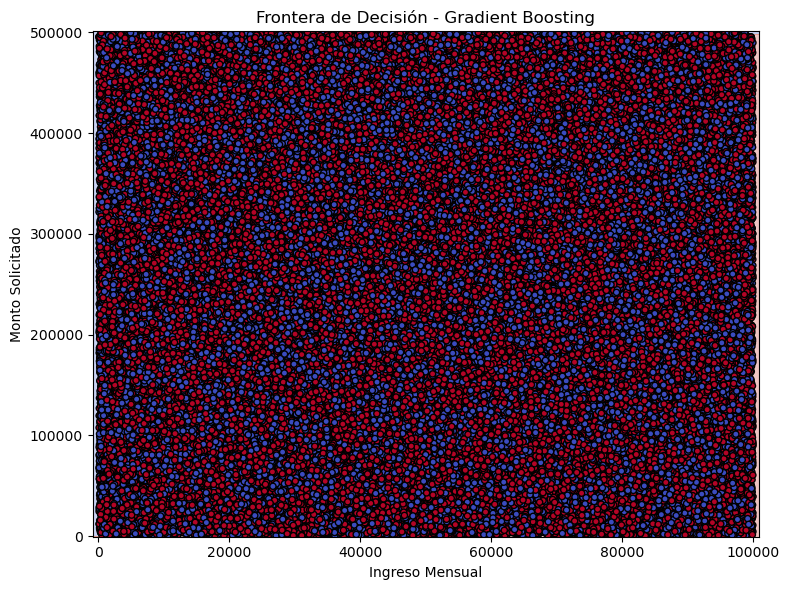

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Malla de puntos para graficar frontera
x_min, x_max = X_vis.iloc[:, 0].min() - 1000, X_vis.iloc[:, 0].max() + 1000
y_min, y_max = X_vis.iloc[:, 1].min() - 1000, X_vis.iloc[:, 1].max() + 1000
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predecir en malla
Z = modelo_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_vis, cmap='coolwarm', edgecolor='k', s=20)
plt.xlabel('Ingreso Mensual')
plt.ylabel('Monto Solicitado')
plt.title('Frontera de Decisión - Gradient Boosting')
plt.tight_layout()
plt.show()


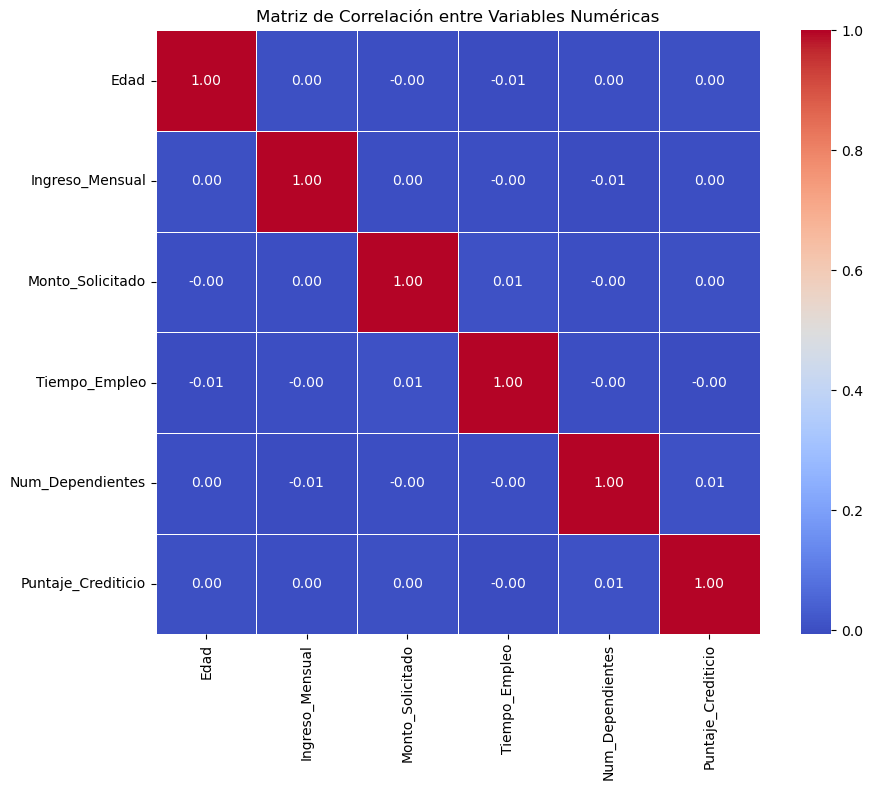

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo columnas numéricas
df_numericas = df.select_dtypes(include='number')

# Calcular matriz de correlación
matriz_corr = df_numericas.corr()

# Visualizar con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()


---

###  Conclusión general sobre el modelo y sus resultados

A pesar de haberse aplicado un modelo de **Gradient Boosting** ajustado con hiperparámetros como `n_estimators`, `learning_rate`, `max_depth` y `subsample`, los resultados reflejan un rendimiento **altamente sesgado hacia la clase mayoritaria**.

1. **La matriz de confusión muestra una clasificación casi exclusiva hacia la clase "No aprobado"**, con muy pocas predicciones correctas de la clase "Aprobado" 

2. La clase "Aprobado" tiene **recall de 0.00**, es decir, el modelo no logra identificar correctamente ninguno de esos casos.

3. La **frontera de decisión del modelo no muestra divisiones claras** entre clases, lo que sugiere que las variables utilizadas no están separando bien los casos en el espacio de decisión. 

4. Además, la **distribución de probabilidades predichas** muestra una fuerte concentración alrededor de un único valor (\~0.6), lo que indica que el modelo tiene **poca confianza** o es **conservador** en sus predicciones, sin aprovechar del todo su capacidad para discriminar.

---



> Aunque se usa Gradient Boosting e, en este caso no logra un buen rendimiento debido al **fuerte desbalance de clases** y la **baja correlación entre variables numéricas**, lo que limita la capacidad del modelo para aprender patrones claros de aprobación por lo tanto al aplicar el PCA no podemos ver bien las diferentes clasificaciones 

---